In [52]:
import pandas as pd
import numpy as np

In [53]:
df = pd.read_excel('erp_order_data.xlsx')
print(df.head())

   id internal_order_number online_order_number store_name  \
0   1      IO20251023000001   ON125347071883677    时代服饰旗舰店   
1   2      IO20251023000002   ON677812434302673    时代服饰旗舰店   
2   3      IO20251023000003   ON475820950373242    都市风尚官方店   
3   4      IO20251023000004   ON517267520467920    时尚潮流旗舰店   
4   5      IO20251023000005   ON262099757832742    时尚潮流旗舰店   

  full_channel_user_id           shipping_date            payment_date  \
0            U00000109 2024-12-14 04:37:51.572 2024-12-13 04:37:51.572   
1            U00000072 2025-07-09 08:35:17.042 2025-07-06 08:35:17.042   
2            U00000012 2025-02-25 05:00:55.199 2025-02-23 05:00:55.199   
3            U00000170 2025-02-10 08:35:19.627 2025-02-07 08:35:19.627   
4            U00000156 2025-06-15 10:06:56.187 2025-06-12 10:06:56.187   

   payable_amount  paid_amount status  ... unit_price product_name  \
0          525.78       525.78    已完成  ...     257.89        修身牛仔裤   
1          157.10       157.10    已完成  ...

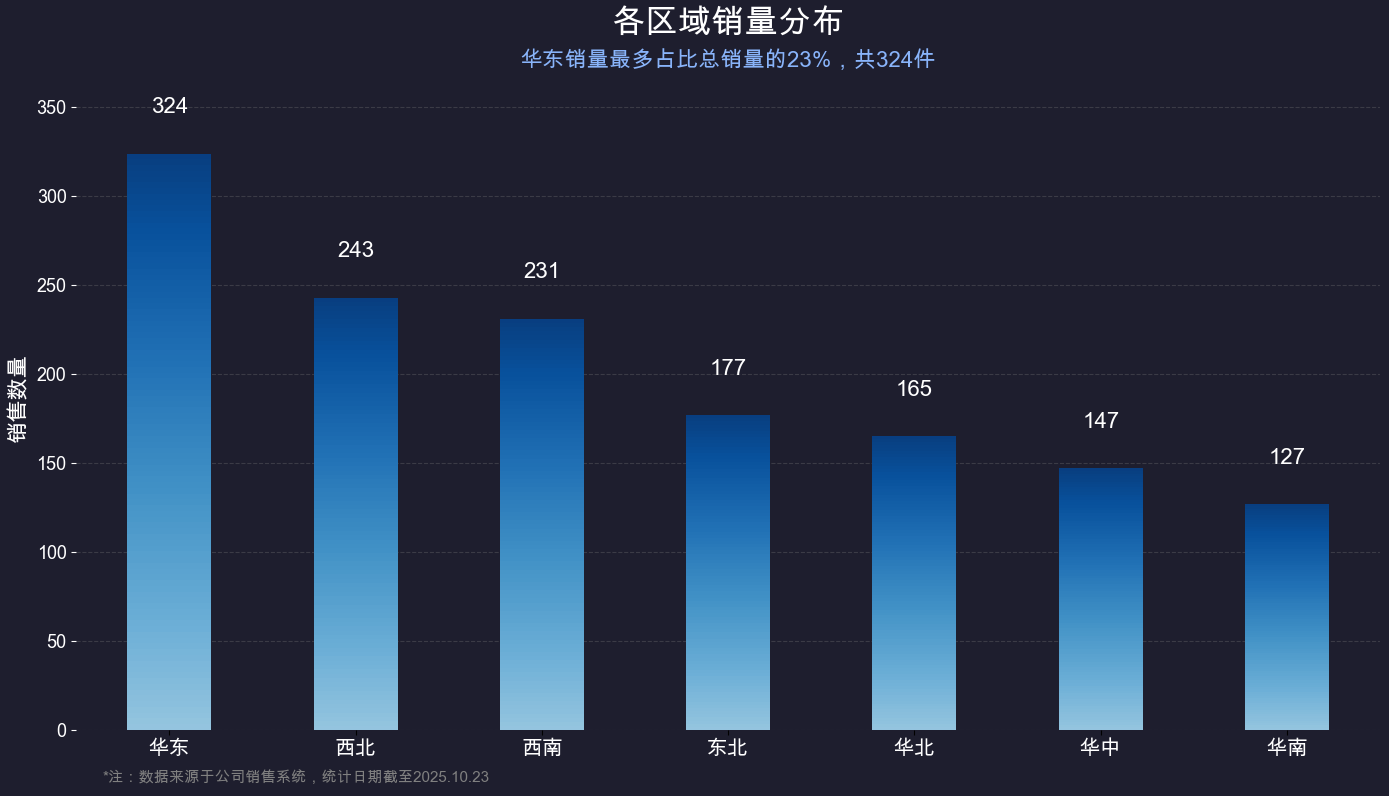


各区域销量统计：
region  total_quantity  order_count
    华东             324          178
    西北             243          152
    西南             231          128
    东北             177          109
    华北             165           94
    华中             147           94
    华南             127           75

总销量：1414 件
订单总数：1000 单


In [6]:
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib as mpl
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection

# 设置中文字体支持
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'SimHei', 'STHeiti']
plt.rcParams['axes.unicode_minus'] = False

# 定义区域映射（根据中国地理区域划分）
region_mapping = {
    '北京': '华北', '天津': '华北', '河北省': '华北', '山西省': '华北', '内蒙古自治区': '华北',
    '辽宁省': '东北', '吉林省': '东北', '黑龙江省': '东北',
    '上海': '华东', '江苏省': '华东', '浙江省': '华东', '安徽省': '华东', '福建省': '华东', 
    '江西省': '华东', '山东省': '华东',
    '河南省': '华中', '湖北省': '华中', '湖南省': '华中',
    '广东省': '华南', '广西壮族自治区': '华南', '海南省': '华南',
    '重庆': '西南', '四川省': '西南', '贵州省': '西南', '云南省': '西南', '西藏自治区': '西南',
    '陕西省': '西北', '甘肃省': '西北', '青海省': '西北', '宁夏回族自治区': '西北', '新疆维吾尔自治区': '西北'
}

# 添加区域列
df['region'] = df['province'].map(region_mapping)

# 按区域统计订单数量
region_stats = df.groupby('region').agg({
    'quantity': 'sum',
    'id': 'count'
}).reset_index()
region_stats.columns = ['region', 'total_quantity', 'order_count']

# 按总数量排序
region_stats = region_stats.sort_values('total_quantity', ascending=False)

# 创建图表
fig, ax = plt.subplots(figsize=(14, 8))

# 设置深色背景
fig.patch.set_facecolor('#1e1e2e')
ax.set_facecolor('#1e1e2e')

# 获取数据
regions = region_stats['region'].tolist()
quantities = region_stats['total_quantity'].tolist()

# 绘制渐变柱形图
bar_width = 0.45  # 缩小柱子宽度
gradient_steps = 100  # 渐变层数

# 获取colormap
cmap = mpl.colormaps.get_cmap('Blues')

for i, (region, qty) in enumerate(zip(regions, quantities)):
    # 为每个柱子创建从下到上的渐变效果
    for j in range(gradient_steps):
        # 计算每一层的高度和位置
        layer_height = qty / gradient_steps
        y_position = j * layer_height
        
        # 从0.4到0.95的渐变（从浅蓝到深蓝）
        color_value = 0.4 + (j / gradient_steps) * 0.55
        color = cmap(color_value)
        
        # 绘制每一层的矩形（无边框）
        rect = Rectangle((i - bar_width/2, y_position), bar_width, layer_height,
                         facecolor=color, edgecolor='none')
        ax.add_patch(rect)
    
    # 在柱子上添加数值标签
    ax.text(i, qty + 20, f'{int(qty)}',
            ha='center', va='bottom', fontsize=16, fontweight='bold', color='white')

# 设置x轴
ax.set_xticks(range(len(regions)))
ax.set_xticklabels(regions, fontsize=15, color='white')
ax.set_xlim(-0.5, len(regions) - 0.5)

# 设置y轴
ax.set_ylim(0, max(quantities) * 1.15)
ax.set_ylabel('销售数量', fontsize=16, fontweight='bold', color='white')
ax.tick_params(axis='y', colors='white', labelsize=13)

# 设置网格线（仅保留横向虚线）
ax.grid(axis='y', linestyle='--', alpha=0.3, color='gray', zorder=0)
ax.set_axisbelow(True)

# 隐藏所有边框
for spine in ax.spines.values():
    spine.set_visible(False)

# 添加标题和注释
total_qty = region_stats['total_quantity'].sum()
max_region = region_stats.iloc[0]
percentage = (max_region['total_quantity'] / total_qty * 100)

title_text = f'各区域销量分布'
subtitle_text = f'{max_region["region"]}销量最多占比总销量的{percentage:.0f}%，共{int(max_region["total_quantity"])}件'

ax.text(0.5, 1.05, title_text, 
        transform=ax.transAxes, fontsize=24, fontweight='bold', 
        ha='center', color='white')
ax.text(0.5, 1.00, subtitle_text,
        transform=ax.transAxes, fontsize=16,
        ha='center', color='#89b4fa')

# 添加数据来源注释
ax.text(0.02, -0.08, '*注：数据来源于公司销售系统，统计日期截至2025.10.23',
        transform=ax.transAxes, fontsize=11, color='gray', style='italic')

plt.tight_layout()
plt.show()

print(f"\n各区域销量统计：")
print(region_stats.to_string(index=False))
print(f"\n总销量：{total_qty} 件")
print(f"订单总数：{df['id'].nunique()} 单")

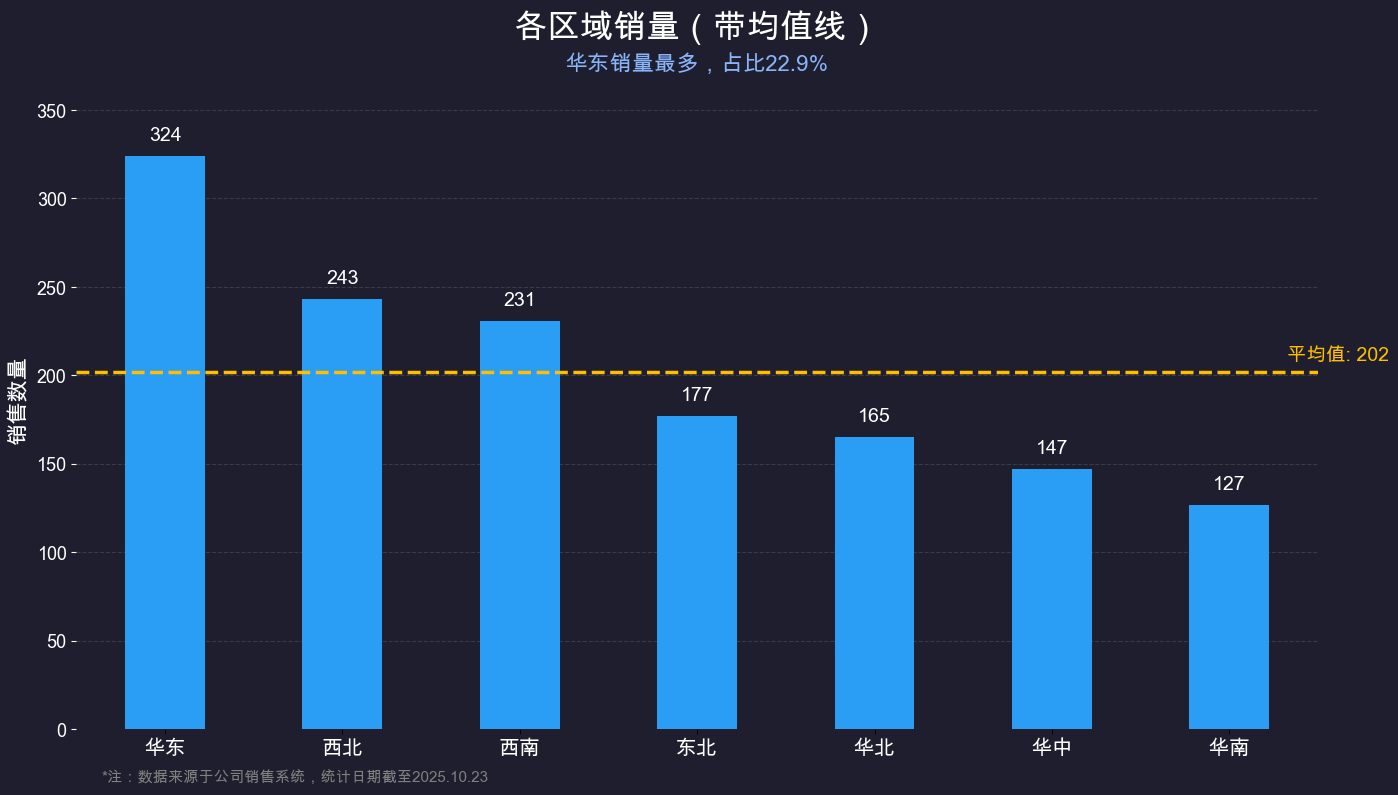


各区域销量统计：
region  total_quantity  order_count
    华东             324          178
    西北             243          152
    西南             231          128
    东北             177          109
    华北             165           94
    华中             147           94
    华南             127           75

平均销量: 202.00 件


In [7]:
# 可复用单元：绘制区域销量柱状图并标注均值（假设 cell 3 已计算并存在 region_stats）
import matplotlib.pyplot as plt
import numpy as np

def plot_region_bar_with_mean(region_stats, figsize=(12,6), bar_color='#2a9df4'):
    """绘制按区域的柱状图并标注均值线。
    输入：region_stats DataFrame (columns: region, total_quantity, order_count)
    """
    regions = region_stats['region'].tolist()
    quantities = region_stats['total_quantity'].tolist()
    x = np.arange(len(regions))

    fig, ax = plt.subplots(figsize=figsize)
    fig.patch.set_facecolor('#1e1e2e')
    ax.set_facecolor('#1e1e2e')

    # 柱状图
    bars = ax.bar(x, quantities, color=bar_color, width=0.45, zorder=3)

    # 在柱子上显示数值标签
    for bar in bars:
        h = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, h + max(quantities) * 0.02,
                f'{int(h)}', ha='center', va='bottom', fontsize=14, color='white', fontweight='bold')

    # 平均值线
    mean_val = np.mean(quantities)
    ax.axhline(mean_val, color='#ffbf00', linestyle='--', linewidth=2.5, zorder=4)
    ax.text(len(regions) - 0.1, mean_val + max(quantities) * 0.02,
            f'平均值: {mean_val:.0f}', color='#ffbf00', fontsize=14, fontweight='bold', ha='right')

    # 坐标轴和样式
    ax.set_xticks(x)
    ax.set_xticklabels(regions, fontsize=15, color='white')
    ax.set_xlim(-0.5, len(regions) - 0.5)
    ax.set_ylim(0, max(quantities) * 1.15)
    ax.set_ylabel('销售数量', fontsize=16, fontweight='bold', color='white')
    ax.tick_params(axis='y', colors='white', labelsize=13)

    # 仅保留横向虚线网格
    ax.grid(axis='y', linestyle='--', alpha=0.3, color='gray', zorder=0)
    ax.set_axisbelow(True)

    # 隐藏外框
    for spine in ax.spines.values():
        spine.set_visible(False)

    # 标题与副标题
    title_text = '各区域销量（带均值线）'
    subtitle_text = f'{region_stats.iloc[0]["region"]}销量最多，占比{region_stats.iloc[0]["total_quantity"] / region_stats["total_quantity"].sum() * 100:.1f}%'
    ax.text(0.5, 1.05, title_text, transform=ax.transAxes, fontsize=24, fontweight='bold', ha='center', color='white')
    ax.text(0.5, 1.00, subtitle_text, transform=ax.transAxes, fontsize=16, ha='center', color='#89b4fa')

    # 注释
    ax.text(0.02, -0.08, '*注：数据来源于公司销售系统，统计日期截至2025.10.23', transform=ax.transAxes, fontsize=11, color='gray', style='italic')

    plt.tight_layout()
    plt.show()

    # 返回均值以便后续使用
    return mean_val

mean_value = plot_region_bar_with_mean(region_stats, figsize=(14,8))
print('\n各区域销量统计：')
print(region_stats.to_string(index=False))
print(f'\n平均销量: {mean_value:.2f} 件')


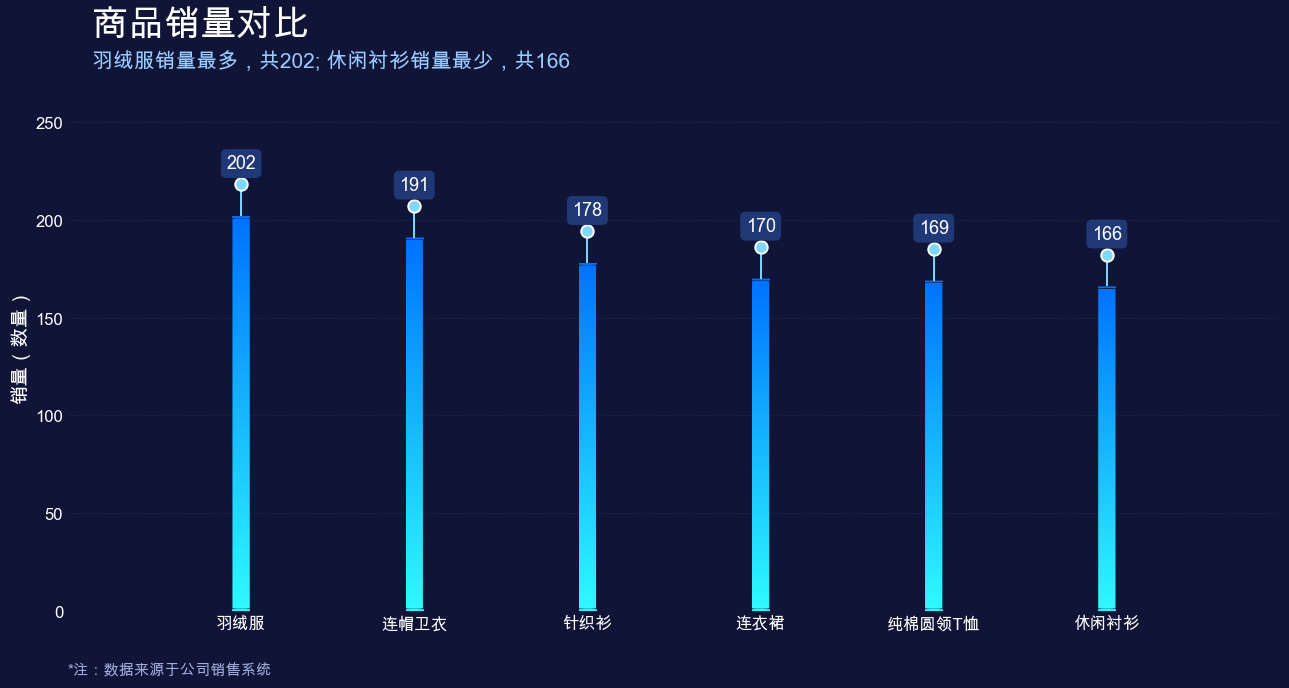


商品销量统计（Top）:
product_name  quantity
         羽绒服       202
        连帽卫衣       191
         针织衫       178
         连衣裙       170
      纯棉圆领T恤       169
        休闲衬衫       166


In [58]:
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch
from matplotlib.colors import LinearSegmentedColormap
import numpy as np

# 参数设置
target_month = 3  # 需要展示的月份（1-12），若无月份数据会自动展示全部
top_n = 6        # 展示Top N 商品

df_products = df.copy()
month_label = f"{target_month}月"
note_date = None

if 'order_date' in df_products.columns:
    df_products['order_date'] = pd.to_datetime(df_products['order_date'], errors='coerce')
    month_data = df_products[df_products['order_date'].dt.month == target_month]
    if not month_data.empty:
        df_products = month_data
        note_date = month_data['order_date'].max()
    else:
        note_date = df_products['order_date'].max()
        month_label = ''  # 若对应月份没有数据，则退回全部数据
else:
    month_label = ''

if df_products.empty:
    raise ValueError('没有可用的商品销量数据用于绘图，请检查数据源。')

product_stats = (
    df_products.groupby('product_name', as_index=False)['quantity']
    .sum()
    .sort_values('quantity', ascending=False)
    .head(top_n)
 )

if product_stats.empty:
    raise ValueError('商品统计结果为空，请确认字段 "product_name" 和 "quantity" 是否存在。')

names = product_stats['product_name'].tolist()
values = product_stats['quantity'].tolist()
max_val = max(values)

top_name = product_stats.iloc[0]['product_name']
top_qty = int(product_stats.iloc[0]['quantity'])
bottom_name = product_stats.iloc[-1]['product_name']
bottom_qty = int(product_stats.iloc[-1]['quantity'])

title_text = f"{month_label}商品销量对比" if month_label else "商品销量对比"
if month_label:
    subtitle_text = f"{top_name}销量最多，{month_label}销量{top_qty}; {bottom_name}最少，{month_label}销量{bottom_qty}"
else:
    subtitle_text = f"{top_name}销量最多，共{top_qty}; {bottom_name}销量最少，共{bottom_qty}"

bg_color = '#101538'
grid_color = '#2c3c66'
dot_color = '#7dd8ff'
value_bg = '#233c7c'

fig, ax = plt.subplots(figsize=(13, 7))
fig.patch.set_facecolor(bg_color)
ax.set_facecolor(bg_color)

cmap = LinearSegmentedColormap.from_list('cyan_blue', ['#2efbff', '#0072ff'])
bar_width = 0.05
bar_spacing = 0.5  # <1 会减少柱子之间的间距
gradient_steps = 256
gradient_template = np.linspace(0, 1, gradient_steps).reshape(gradient_steps, 1)

x = np.arange(len(names)) * bar_spacing  # 使用 numpy 精准控制柱子位置并缩小间距
bars = ax.bar(x, values, width=bar_width, color='none', edgecolor='none', zorder=2)

def bar_rounding(height):
    return np.clip(height * 0.02, bar_width * 6, bar_width * 28)

for bar, val in zip(bars, values):
    left = bar.get_x()
    rounding = bar_rounding(val)
    patch = FancyBboxPatch((left, 0), bar_width, val,
                            boxstyle=f'round,pad=0,rounding_size={rounding}',
                            linewidth=0, facecolor='none', edgecolor='none', zorder=4)
    ax.add_patch(patch)
    img = ax.imshow(gradient_template, extent=(left, left + bar_width, 0, val), origin='lower',
                    aspect='auto', cmap=cmap, zorder=3, interpolation='bicubic')
    img.set_clip_path(patch)

stem_height = max_val * 0.08
label_offset = max_val * 0.03

ax.vlines(x, values, np.array(values) + stem_height, colors=dot_color, linewidth=1.4, zorder=5)
ax.scatter(x, np.array(values) + stem_height, s=80, color=dot_color, edgecolors='white', linewidth=1.4, zorder=6)

for xi, val in zip(x, values):
    ax.text(xi, val + stem_height + label_offset, f"{int(val)}",
            ha='center', va='bottom', fontsize=13, color='white', fontweight='bold', zorder=7,
            bbox=dict(boxstyle='round,pad=0.3', facecolor=value_bg, edgecolor='none', alpha=0.92))

ax.set_xticks(x)
ax.set_xticklabels(names, fontsize=13, color='white')
pad = max(bar_width * 3, bar_spacing)
if len(x) > 0:
    x_min, x_max = float(np.min(x)), float(np.max(x))
else:
    x_min, x_max = 0.0, 0.0
ax.set_xlim(x_min - pad, x_max + pad)
ax.set_ylim(0, max_val * 1.35)
ax.set_ylabel('销量（数量）', fontsize=14, color='white')
ax.tick_params(axis='both', colors='white', labelsize=12, width=0.8, length=0)
ax.set_axisbelow(True)
ax.yaxis.grid(True, linestyle='--', color=grid_color, alpha=0.35, linewidth=0.6)

for spine in ax.spines.values():
    spine.set_visible(False)

ax.text(0.02, 1.08, title_text, transform=ax.transAxes, fontsize=26, fontweight='bold',
        ha='left', color='white')
ax.text(0.02, 1.02, subtitle_text, transform=ax.transAxes, fontsize=15,
        ha='left', color='#9acbff')

note_text = '*注：数据来源于公司销售系统'
if note_date is not None and pd.notna(note_date):
    note_text += f"，统计日期截至{note_date.strftime('%Y.%m.%d')}"
ax.text(0.0, -0.12, note_text, transform=ax.transAxes, fontsize=11, color='#9fa9d8', style='italic')

plt.tight_layout()
plt.show()

print('\n商品销量统计（Top）:')
print(product_stats.to_string(index=False))